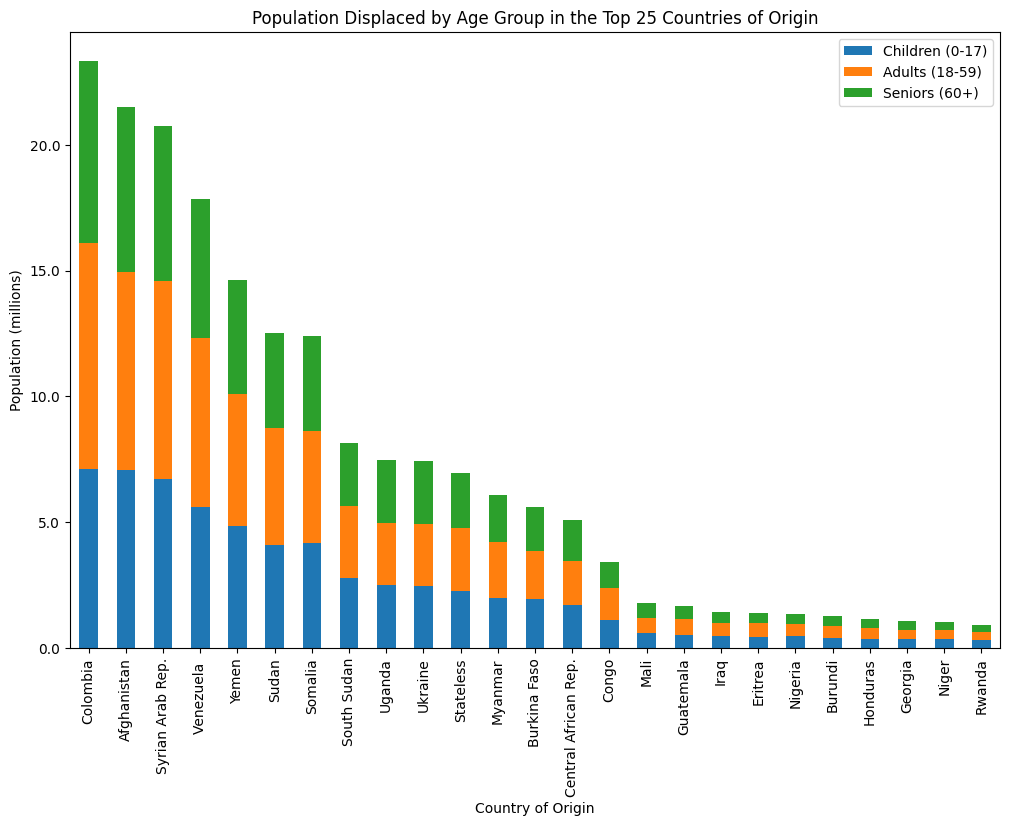

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Load the data from the CSV file
file_path = 'demographics.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Define broader age categories by summing the relevant columns
df['Children (0-17)'] = df.filter(regex='Female|Male [0-9] - 1[0-7]').sum(axis=1)
df['Adults (18-59)'] = df.filter(regex='Female|Male 1[8-9] - [2-5][0-9]').sum(axis=1)
df['Seniors (60+)'] = df.filter(regex='Female|Male 60').sum(axis=1)

# Summarize the data for each country of origin
summary_df = df.groupby('Country of origin').agg({
    'Children (0-17)': 'sum',
    'Adults (18-59)': 'sum',
    'Seniors (60+)': 'sum'
})

# Sort countries by total population and select the top 25
top_countries_origin = summary_df.sum(axis=1).nlargest(25).index
top_summary_df_origin = summary_df.loc[top_countries_origin]

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(12, 8))  # Adjusted for a better fit
(top_summary_df_origin / 1e6).plot(kind='bar', ax=ax, stacked=True)  # Convert population to millions

# Format the y-axis labels to show as 'x million' without trailing zeroes
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.1f}'.format(x)))

# Rotate the x-axis labels for better legibility
plt.xticks(rotation=90)

# Set the chart title and labels
ax.set_title('Population Displaced by Age Group in the Top 25 Countries of Origin')
ax.set_xlabel('Country of Origin')
ax.set_ylabel('Population (millions)')

# Save the figure to a file
plt.savefig('population_bar_chart_origin.png', bbox_inches='tight', dpi=400)

# Show the figure
plt.show()


/tmp/ipykernel_33905/753449265.py:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


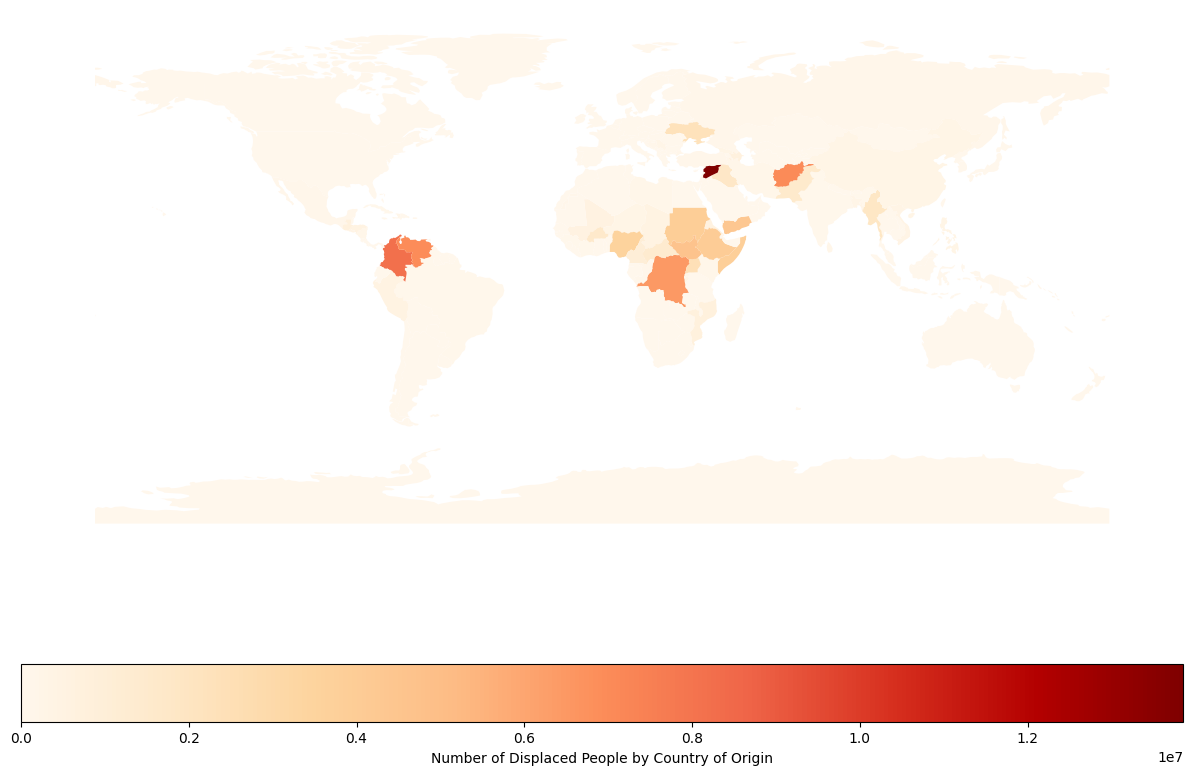

In [38]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming you have geopandas and matplotlib installed.
# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Load your CSV data
file_path = 'demographics.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Create a new column for total population if it doesn't exist
if 'Total' not in df.columns:
    df['Total'] = df[['Female total', 'Male total']].sum(axis=1)

# Group by country of origin ISO and sum the totals
origin_totals = df.groupby('Country of origin (ISO)')['Total'].sum()

# Merge the population data with the world GeoDataFrame on ISO codes
world = world.merge(origin_totals, how='left', left_on='iso_a3', right_index=True)

# Replace NaN values with 0 for the 'Total' column
world['Total'] = world['Total'].fillna(0)

# Plot the heatmap
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(column='Total', ax=ax, legend=True, cmap='OrRd',
           legend_kwds={'label': "Number of Displaced People by Country of Origin",
                        'orientation': "horizontal"})

# Remove axis for better aesthetics
ax.set_axis_off()
plt.show()
